# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
****

In [246]:
import pandas as pd

## imports for Python, Pandas

In [247]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [248]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [249]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [250]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 

In [251]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [252]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [253]:
# read json into df
json.load((open('data/world_bank_projects.json')))
json_df = pd.read_json('data/world_bank_projects.json')
json_df.head()

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


Question 1 - group by country and sort for top 10

In [254]:
ques1 = pd.DataFrame(json_df[['countryname','_id']])
ques1 = ques1.groupby('countryname')['_id'].count()
ques1

countryname
Africa                         11
Antigua and Barbuda             1
Arab Republic of Egypt          2
Argentine Republic              2
Bosnia and Herzegovina          1
                               ..
Union of the Comoros            3
United Mexican States           2
United Republic of Tanzania     8
West Bank and Gaza              6
World                           2
Name: _id, Length: 118, dtype: int64

In [255]:
ques1 = pd.DataFrame(ques1)
ques1.reset_index()
ques1

,_id
countryname,
Africa,11
Antigua and Barbuda,1
Arab Republic of Egypt,2
Argentine Republic,2
Bosnia and Herzegovina,1
...,...
Union of the Comoros,3
United Mexican States,2
United Republic of Tanzania,8


In [256]:
ques1 = ques1.sort_values('_id', ascending = False)

In [257]:
ques1.head(10)

,_id
countryname,
People's Republic of China,19
Republic of Indonesia,19
Socialist Republic of Vietnam,17
Republic of India,16
Republic of Yemen,13
People's Republic of Bangladesh,12
Nepal,12
Kingdom of Morocco,12
Republic of Mozambique,11


Question 2 - read the name in the list of mjtheme_namecode column to extract theme name and melt down for each project id

In [258]:
ques2 = json_df[['mjtheme_namecode','_id']].copy()
ques2

,mjtheme_namecode,_id
0,"[{'code': '8', 'name': 'Human development'}, {...",{'$oid': '52b213b38594d8a2be17c780'}
1,"[{'code': '1', 'name': 'Economic management'},...",{'$oid': '52b213b38594d8a2be17c781'}
2,"[{'code': '5', 'name': 'Trade and integration'...",{'$oid': '52b213b38594d8a2be17c782'}
3,"[{'code': '7', 'name': 'Social dev/gender/incl...",{'$oid': '52b213b38594d8a2be17c783'}
4,"[{'code': '5', 'name': 'Trade and integration'...",{'$oid': '52b213b38594d8a2be17c784'}
...,...,...
495,"[{'code': '4', 'name': 'Financial and private ...",{'$oid': '52b213b38594d8a2be17c96f'}
496,"[{'code': '8', 'name': 'Human development'}, {...",{'$oid': '52b213b38594d8a2be17c970'}
497,"[{'code': '10', 'name': 'Rural development'}, ...",{'$oid': '52b213b38594d8a2be17c971'}
498,"[{'code': '10', 'name': 'Rural development'}, ...",{'$oid': '52b213b38594d8a2be17c972'}


In [259]:
def find_name (arr):
    hold = []
    for x in arr:
        if x['name'] != '':
            hold.append(x['name'])
    return hold

In [260]:
ques2['theme'] = ques2['mjtheme_namecode'].apply(find_name)
ques2

,mjtheme_namecode,_id,theme
0,"[{'code': '8', 'name': 'Human development'}, {...",{'$oid': '52b213b38594d8a2be17c780'},[Human development]
1,"[{'code': '1', 'name': 'Economic management'},...",{'$oid': '52b213b38594d8a2be17c781'},"[Economic management, Social protection and ri..."
2,"[{'code': '5', 'name': 'Trade and integration'...",{'$oid': '52b213b38594d8a2be17c782'},"[Trade and integration, Public sector governan..."
3,"[{'code': '7', 'name': 'Social dev/gender/incl...",{'$oid': '52b213b38594d8a2be17c783'},"[Social dev/gender/inclusion, Social dev/gende..."
4,"[{'code': '5', 'name': 'Trade and integration'...",{'$oid': '52b213b38594d8a2be17c784'},"[Trade and integration, Financial and private ..."
...,...,...,...
495,"[{'code': '4', 'name': 'Financial and private ...",{'$oid': '52b213b38594d8a2be17c96f'},"[Financial and private sector development, Soc..."
496,"[{'code': '8', 'name': 'Human development'}, {...",{'$oid': '52b213b38594d8a2be17c970'},"[Human development, Trade and integration, Pub..."
497,"[{'code': '10', 'name': 'Rural development'}, ...",{'$oid': '52b213b38594d8a2be17c971'},[Rural development]
498,"[{'code': '10', 'name': 'Rural development'}, ...",{'$oid': '52b213b38594d8a2be17c972'},"[Rural development, Rural development, Rural d..."


In [261]:
ques2_clean = ques2['theme'].apply(pd.Series).merge(ques2, left_index = True, right_index = True)\
    .drop(['theme'], axis = 1) \
    .melt(id_vars = ['mjtheme_namecode', '_id'], value_name = "theme")\
    .drop("variable", axis = 1) \
    .dropna()
ques2_clean

,mjtheme_namecode,_id,theme
0,"[{'code': '8', 'name': 'Human development'}, {...",{'$oid': '52b213b38594d8a2be17c780'},Human development
1,"[{'code': '1', 'name': 'Economic management'},...",{'$oid': '52b213b38594d8a2be17c781'},Economic management
2,"[{'code': '5', 'name': 'Trade and integration'...",{'$oid': '52b213b38594d8a2be17c782'},Trade and integration
3,"[{'code': '7', 'name': 'Social dev/gender/incl...",{'$oid': '52b213b38594d8a2be17c783'},Social dev/gender/inclusion
4,"[{'code': '5', 'name': 'Trade and integration'...",{'$oid': '52b213b38594d8a2be17c784'},Trade and integration
...,...,...,...
2452,"[{'code': '10', 'name': 'Rural development'}, ...",{'$oid': '52b213b38594d8a2be17c944'},Public sector governance
2459,"[{'code': '8', 'name': 'Human development'}, {...",{'$oid': '52b213b38594d8a2be17c94b'},Human development
2463,"[{'code': '2', 'name': 'Public sector governan...",{'$oid': '52b213b38594d8a2be17c94f'},Public sector governance
2466,"[{'code': '11', 'name': 'Environment and natur...",{'$oid': '52b213b38594d8a2be17c952'},Public sector governance


In [262]:
ques2_result = ques2_clean['theme'].value_counts()
ques2_result = pd.DataFrame(ques2_result)
ques2_result = ques2_result.reset_index()
ques2_result.columns = ['Theme','Count'] #df.rename(columns={"A": "a", "B": "c"})
ques2_result.head(10)

,Theme,Count
0,Environment and natural resources management,223
1,Rural development,202
2,Human development,197
3,Public sector governance,184
4,Social protection and risk management,158
5,Financial and private sector development,130
6,Social dev/gender/inclusion,119
7,Trade and integration,72
8,Urban development,47
9,Economic management,33


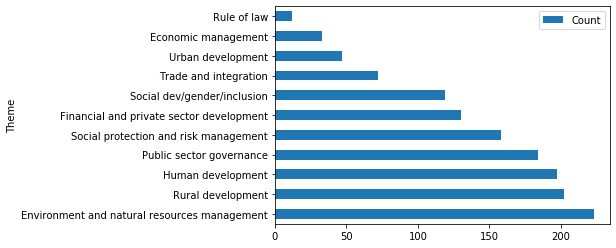

In [263]:
#import matplotlib.pyplot as plt
ques2_result.plot.barh(x='Theme',y='Count')
#plt.show()

Question 3 - extract code and name from mjtheme_namecode to find unique code-name table for filling up missing name values

In [264]:
code_name = pd.DataFrame(columns=['code','name'])
for row in json_df.mjtheme_namecode:
    code_name = code_name.append(json_normalize(row))
code_name = code_name.reset_index(drop=True)
code_name

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
...,...,...
1494,10,Rural development
1495,9,Urban development
1496,8,Human development
1497,5,Trade and integration


In [265]:
code_name_catalog = code_name[code_name['name']!='']
code_name_catalog = code_name_catalog.drop_duplicates('code')
code_name_catalog

,code,name
0,8,Human development
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
8,7,Social dev/gender/inclusion
11,4,Financial and private sector development
18,10,Rural development
53,9,Urban development


In [266]:
code_name_clean = pd.merge(code_name,code_name_catalog, how='left', left_on='code', right_on='code')
code_name_clean = code_name_clean.reset_index(drop=True)
code_name_clean

,code,name_x,name_y
0,8,Human development,Human development
1,11,,Environment and natural resources management
2,1,Economic management,Economic management
3,6,Social protection and risk management,Social protection and risk management
4,5,Trade and integration,Trade and integration
...,...,...,...
1494,10,Rural development,Rural development
1495,9,Urban development,Urban development
1496,8,Human development,Human development
1497,5,Trade and integration,Trade and integration


In [267]:
del code_name_clean['name_x']
code_name_clean.columns = ['code','name']
code_name_clean

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
...,...,...
1494,10,Rural development
1495,9,Urban development
1496,8,Human development
1497,5,Trade and integration
